<a href="https://colab.research.google.com/github/teefirdaustf/mental-health_remote-work/blob/main/Data_Preprocessing_DA_GA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [67]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [4]:
#read dataset, csv files (uploaded to colab)

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_data.csv')

#check imported dataset
print(train_df.shape)
print(test_df.shape)

#train_df.head(2).T
#test_df.head(2).T

(22750, 9)
(12250, 8)


In [5]:
#setting the Employee ID for both csv files as the index for easier querying

train_df.set_index('Employee ID', inplace=True)
test_df.set_index('Employee ID', inplace=True)


In [6]:
train_df

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Employee ID,,,,,,,,
fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...
fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72


In [14]:
#check datatypes of each column in the dataset for train.csv

train_df.dtypes

,0
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,float64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


In [19]:
#converting data type appropriately

train_df['Date of Joining'] = pd.to_datetime(train_df['Date of Joining'])
test_df['Date of Joining'] = pd.to_datetime(test_df['Date of Joining'])

In [16]:
#to get the sum of unique values in each column

train_df.nunique()

,0
Date of Joining,366
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


In [18]:
train_df.shape

(22750, 8)

In [20]:
df1 = train_df.copy()
df2 = test_df.copy()

In [21]:
df1.isna().sum()

,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [26]:
#df1['Mental Fatigue Score'].unique()
#df1['Burn Rate'].unique()
df1['Resource Allocation'].unique()

array([ 3.,  2., nan,  1.,  7.,  4.,  6.,  5.,  8., 10.,  9.])

In [28]:
#to get the percentage of missing values for each column, less than 10% max

(df1.isnull().mean() * 100).sort_values(ascending=False)

,0
Mental Fatigue Score,9.305495
Resource Allocation,6.070330
Burn Rate,4.940659
Date of Joining,0.000000
Gender,0.000000
Company Type,0.000000
WFH Setup Available,0.000000
Designation,0.000000


In [29]:
#dropping all rows with null values

df1 = df1.dropna()

In [32]:
df1.isna()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Employee ID,,,,,,,,
fffe32003000360033003200,False,False,False,False,False,False,False,False
fffe3700360033003500,False,False,False,False,False,False,False,False
fffe32003400380032003900,False,False,False,False,False,False,False,False
fffe31003900340031003600,False,False,False,False,False,False,False,False
fffe3300350037003500,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
fffe3300390030003600,False,False,False,False,False,False,False,False
fffe32003500370033003200,False,False,False,False,False,False,False,False
fffe33003000350031003800,False,False,False,False,False,False,False,False


In [47]:
#check for duplicates

df1.duplicated().sum()

6

In [48]:
df1[df1.duplicated()]

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Employee ID,,,,,,,,
fffe32003000310032003900,2008-07-18,Female,Service,No,3.0,6.0,7.7,0.58
fffe31003200380034003600,2008-04-17,Male,Product,No,4.0,7.0,6.7,0.56
fffe3400360035003400,2008-08-14,Female,Service,Yes,0.0,1.0,0.0,0.00
fffe31003000330035003100,2008-06-04,Female,Service,No,1.0,3.0,4.4,0.29
fffe340038003500,2008-02-22,Female,Service,Yes,1.0,2.0,4.0,0.24
fffe32003900310036003100,2008-06-28,Male,Service,No,3.0,6.0,8.6,0.68


In [55]:
#dropping all duplicated rows

df1 = df1.drop_duplicates()

In [56]:
df1.duplicated().sum()

0

# Exploration

Text(0, 0.5, 'Count')

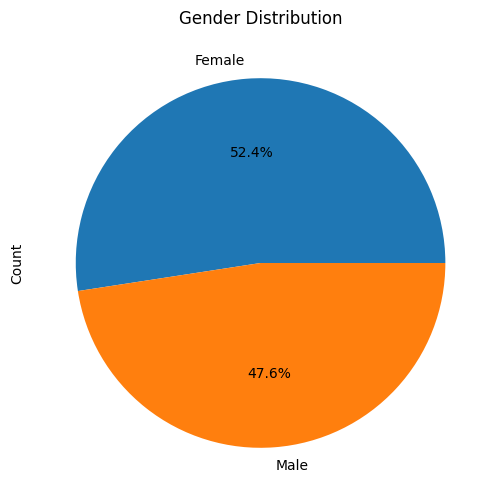

In [57]:
#dataset gender distribution

df1_gender = df1['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
df1_gender.set_title('Gender Distribution')
df1_gender.set_ylabel('Count')

Text(0.5, 1.0, 'Workload vs Mental Fatigue Score')

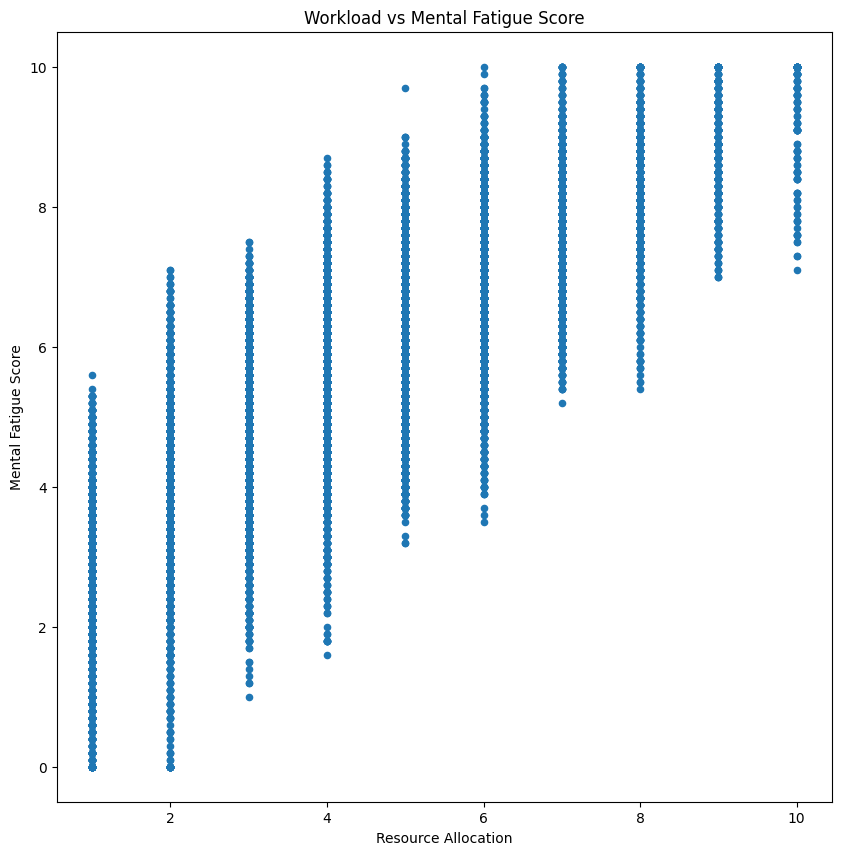

In [58]:
#checking the relationship between employee's given workload and mental fatigueness

df1_workload_vs_fatigue = df1.plot.scatter(x='Resource Allocation', y='Mental Fatigue Score', figsize=(10,10))
df1_workload_vs_fatigue.set_title('Workload vs Mental Fatigue Score')

In [59]:
df1.head(2).T

Employee ID,fffe32003000360033003200,fffe3700360033003500
Date of Joining,2008-09-30 00:00:00,2008-11-30 00:00:00
Gender,Female,Male
Company Type,Service,Service
WFH Setup Available,No,Yes
Designation,2.0,1.0
Resource Allocation,3.0,2.0
Mental Fatigue Score,3.8,5.0
Burn Rate,0.16,0.36


Text(0, 0.5, 'Frequency')

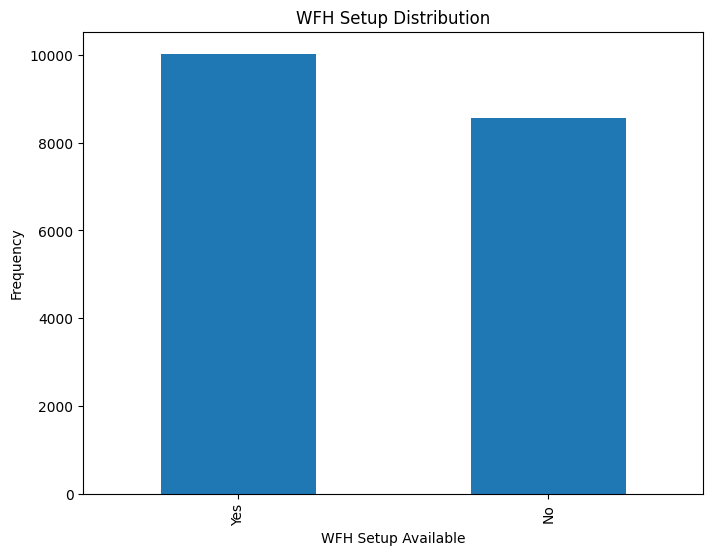

In [63]:
#check how many have proper WFH setup

#df1['WFH Setup Available'].value_counts()
df1_wfh_setup_distb = df1['WFH Setup Available'].value_counts().plot(kind='bar', figsize=(8,6))
df1_wfh_setup_distb.set_title('WFH Setup Distribution')
df1_wfh_setup_distb.set_xlabel('WFH Setup Available')
df1_wfh_setup_distb.set_ylabel('Frequency')

In [64]:
#group employee levels

bins = [0, 1.5, 3.5, 5.0]  # Bin edges for low, mid, and high
labels = ['Low', 'Mid', 'High']  # Labels for the bins

df1['Designation Level'] = pd.cut(df1['Designation'], bins=bins, labels=labels, include_lowest=True)

In [65]:
df1.head(2).T

Employee ID,fffe32003000360033003200,fffe3700360033003500
Date of Joining,2008-09-30 00:00:00,2008-11-30 00:00:00
Gender,Female,Male
Company Type,Service,Service
WFH Setup Available,No,Yes
Designation,2.0,1.0
Resource Allocation,3.0,2.0
Mental Fatigue Score,3.8,5.0
Burn Rate,0.16,0.36
Designation Level,Mid,Low


In [96]:
df1['Date of Joining'].describe()

,Date of Joining
count,18584
mean,2008-07-01 11:57:45.174343680
min,2008-01-01 00:00:00
25%,2008-04-01 00:00:00
50%,2008-07-03 00:00:00
75%,2008-09-30 00:00:00
max,2008-12-31 00:00:00


<ipython-input-69-7fe67e0f640e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wfh_designation_counts = df1.groupby(['WFH Setup Available', 'Designation Level']).size().unstack()


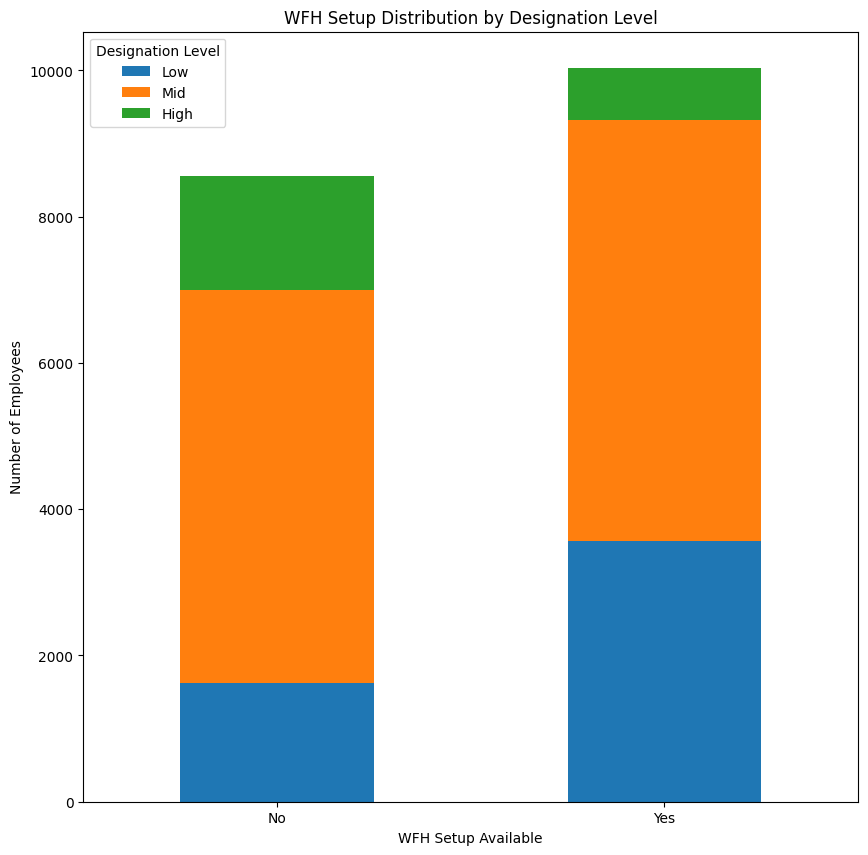

In [69]:
#to have an overview of "Which staff designation level has/hasnt a wfh setup the most?"

wfh_designation_counts = df1.groupby(['WFH Setup Available', 'Designation Level']).size().unstack()

ax = wfh_designation_counts.plot(kind='bar', stacked=True, figsize=(10, 10))
ax.set_title('WFH Setup Distribution by Designation Level')
ax.set_xlabel('WFH Setup Available')
ax.set_ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(title='Designation Level')  # Add a legend for clarity
plt.show()

In [73]:
df1_wfh_ctype = df1.groupby('Company Type')['WFH Setup Available'].value_counts()

df1_wfh_ctype

Company Type  WFH Setup Available
Product       Yes                    3465
              No                     2950
Service       Yes                    6563
              No                     5606
Name: count, dtype: int64

Text(0.5, 1.0, 'Company Type vs WFH Setup Availability')

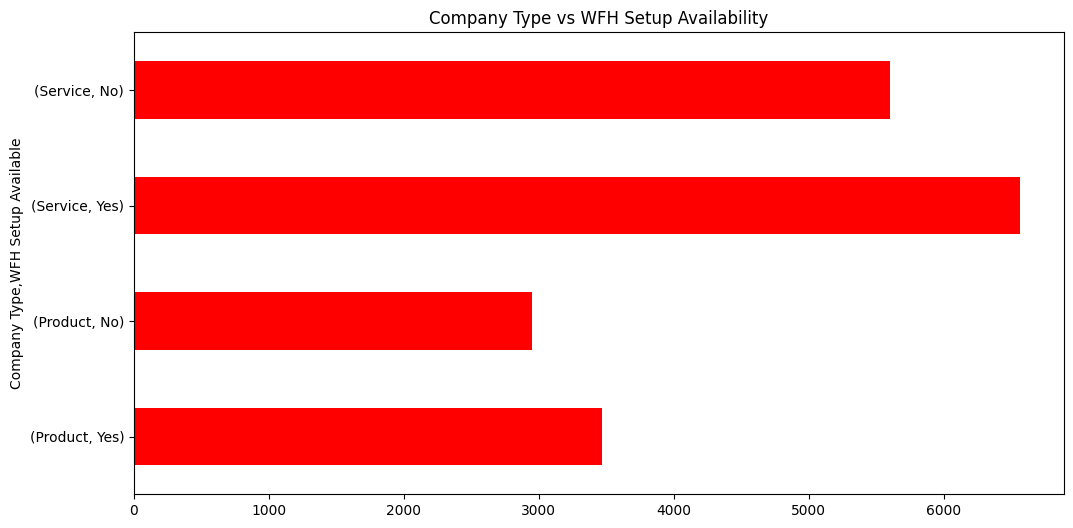

In [87]:
df1_wfh_ctype.plot.barh(x='Company Type',y='WFH Setup Available',color='red', figsize=(12,6)).set_title('Company Type vs WFH Setup Availability')

In [88]:
#to check designation level and mental fatigue

df1_designation_vs_fatigue = df1.groupby('Designation Level')['Mental Fatigue Score'].mean()

df1_designation_vs_fatigue

<ipython-input-88-170a074cdf28>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1_designation_vs_fatigue = df1.groupby('Designation Level')['Mental Fatigue Score'].mean()


,Mental Fatigue Score
Designation Level,
Low,4.013240
Mid,6.092337
High,7.903270


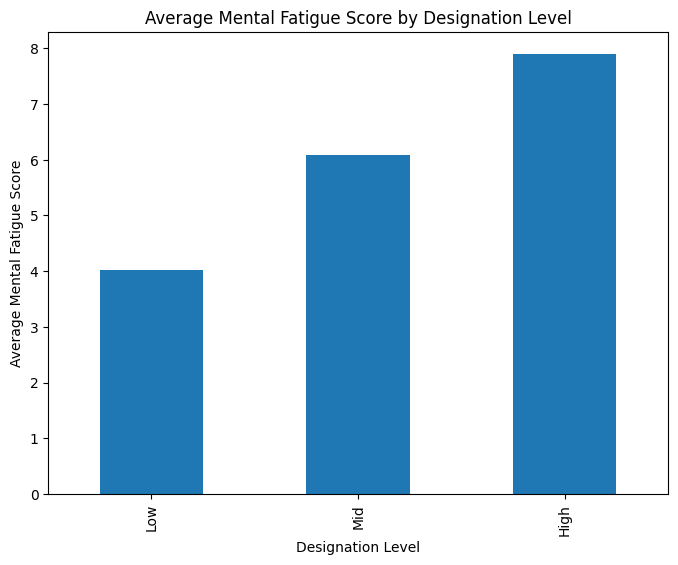

In [93]:
ax = df1_designation_vs_fatigue.plot.bar(figsize=(8,6))
ax.set_title('Average Mental Fatigue Score by Designation Level')
ax.set_xlabel('Designation Level')
ax.set_ylabel('Average Mental Fatigue Score')
plt.show()

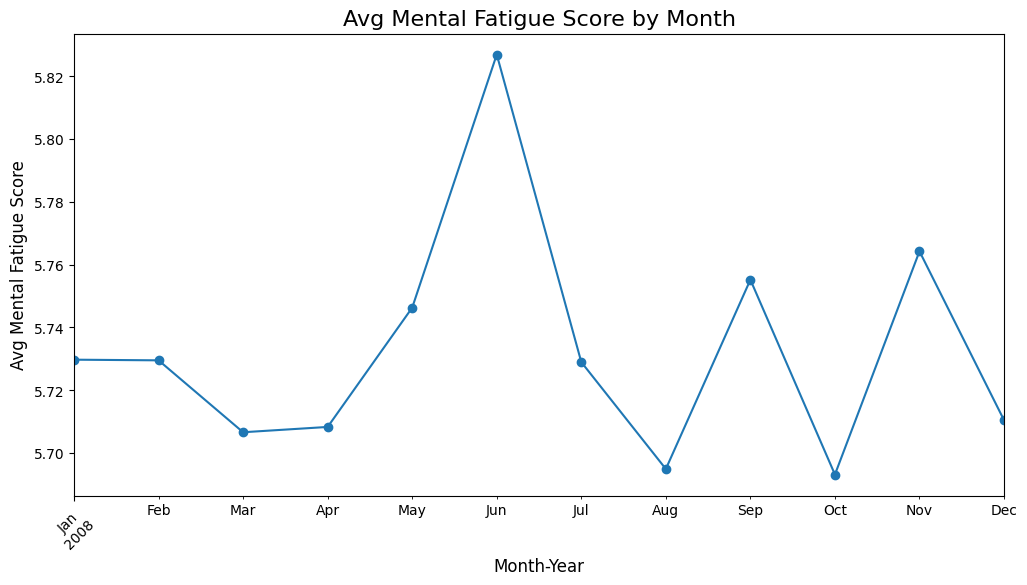

In [98]:
# to get an overview of the avg mental fatigue score for each month based on joined date

df1['Month-Year'] = df1['Date of Joining'].dt.to_period('M')
monthly_mean_fatigue = df1.groupby('Month-Year')['Mental Fatigue Score'].mean()

ax = monthly_mean_fatigue.plot(kind='line', figsize=(12, 6), marker='o')

# Add labels and title
ax.set_title('Avg Mental Fatigue Score by Month', fontsize=16)
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Avg Mental Fatigue Score', fontsize=12)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


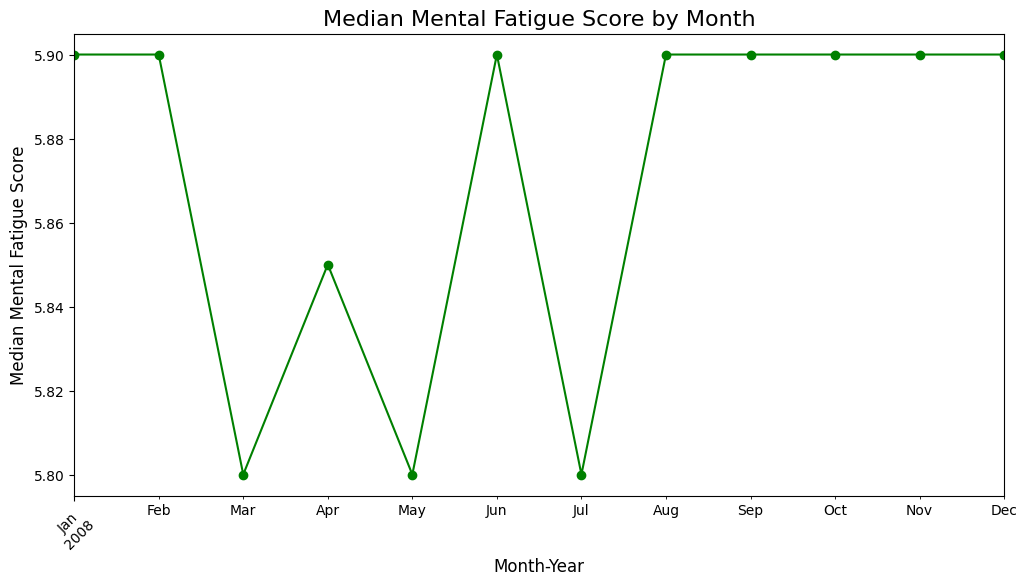

In [99]:
#by median (to discount outliers)

monthly_median_fatigue = df1.groupby('Month-Year')['Mental Fatigue Score'].median()

ax = monthly_median_fatigue.plot(kind='line', figsize=(12, 6), marker='o', color='green')

# Add labels and title
ax.set_title('Median Mental Fatigue Score by Month', fontsize=16)
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Median Mental Fatigue Score', fontsize=12)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

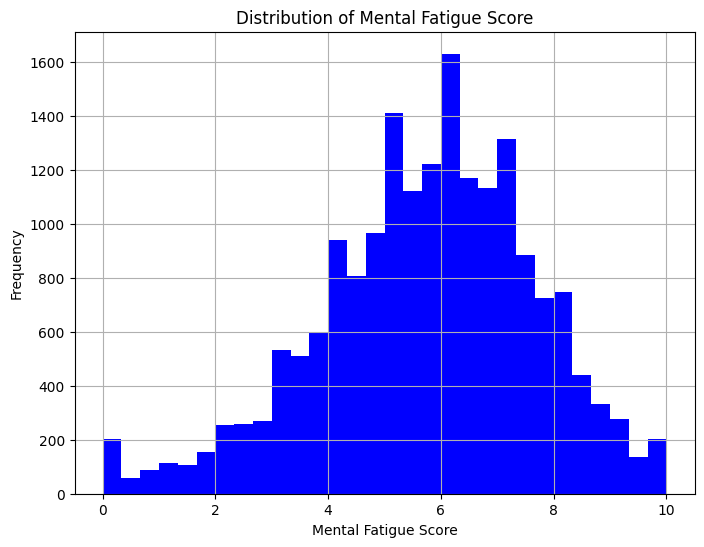

In [100]:
#check distribution (to identify if mean or median should be more meaningful)

df1['Mental Fatigue Score'].hist(bins=30, figsize=(8, 6), color='blue')
plt.title('Distribution of Mental Fatigue Score')
plt.xlabel('Mental Fatigue Score')
plt.ylabel('Frequency')
plt.show()

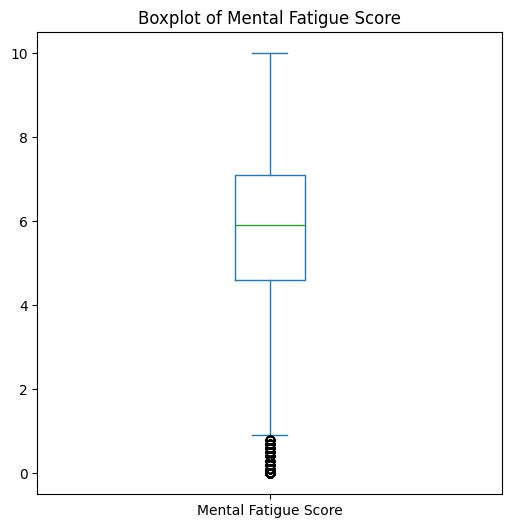

In [101]:
#check outliers with boxplot

df1['Mental Fatigue Score'].plot(kind='box', figsize=(6, 6))
plt.title('Boxplot of Mental Fatigue Score')
plt.show()

In [102]:
#calculate level of skewness

skewness = df1['Mental Fatigue Score'].skew()
print(f"Skewness: {skewness}")

Skewness: -0.4378549828367371


If skewness < 0: The data is negatively skewed (tail on the left). The median is more robust.

# Investigating outliers

In [104]:
#calculate IQR

Q1 = df1['Mental Fatigue Score'].quantile(0.25)
Q3 = df1['Mental Fatigue Score'].quantile(0.75)
IQR = Q3 - Q1

IQR

2.5

In [106]:
#define outlier boundaries

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

0.8499999999999996
10.85


In [108]:
#identify outliers

outliers = df1[(df1['Mental Fatigue Score'] < lower_bound) |
               (df1['Mental Fatigue Score'] > upper_bound)]

outliers

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Designation Level,Month-Year
Employee ID,,,,,,,,,,
fffe31003600360039003900,2008-09-27,Male,Product,Yes,0.0,1.0,0.8,0.05,Low,2008-09
fffe33003200330030003500,2008-03-13,Male,Product,No,1.0,1.0,0.0,0.00,Low,2008-03
fffe31003100370037003500,2008-10-06,Male,Product,Yes,0.0,1.0,0.0,0.00,Low,2008-10
fffe31003400340032003700,2008-08-09,Male,Service,Yes,0.0,1.0,0.0,0.00,Low,2008-08
fffe32003800370033003900,2008-04-16,Female,Service,No,0.0,1.0,0.5,0.00,Low,2008-04
...,...,...,...,...,...,...,...,...,...,...
fffe32003300360037003500,2008-06-22,Male,Service,Yes,0.0,1.0,0.6,0.04,Low,2008-06
fffe31003700310038003300,2008-06-12,Male,Service,Yes,0.0,1.0,0.8,0.00,Low,2008-06
fffe32003600300030003400,2008-04-12,Male,Service,Yes,0.0,1.0,0.0,0.00,Low,2008-04


In [110]:
#counting the outliers

num_outliers = len(outliers)
print(f"Number of outliers: {num_outliers}")

percentage_outliers = (num_outliers / len(df1)) * 100
print(f"Percentage of outliers: {percentage_outliers:.2f}%")

Number of outliers: 309
Percentage of outliers: 1.66%


In [111]:
#filter out outliers

df1_no_outliers = df1[(df1['Mental Fatigue Score'] >= lower_bound) &
                      (df1['Mental Fatigue Score'] <= upper_bound)]

df1_no_outliers

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Designation Level,Month-Year
Employee ID,,,,,,,,,,
fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,Mid,2008-09
fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,Low,2008-11
fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,Low,2008-11
fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,Mid,2008-07
fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29,Mid,2008-11
...,...,...,...,...,...,...,...,...,...,...
fffe3300390030003600,2008-12-15,Female,Product,Yes,1.0,3.0,6.0,0.48,Low,2008-12
fffe32003500370033003200,2008-05-27,Male,Product,No,3.0,7.0,6.2,0.54,Mid,2008-05
fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59,Mid,2008-01


In [112]:
#confirm anticipated change
print(f"Original dataset size: {len(df1)}")
print(f"Dataset size after removing outliers: {len(df1_no_outliers)}")

Original dataset size: 18584
Dataset size after removing outliers: 18275


In [114]:
#replacing the original dataset

df1 = df1_no_outliers
print(f"Original dataset size: {len(df1)}")

Original dataset size: 18275
